# Letter Frequency in the English Language

### Get the data
`words.txt` is a list of 370k English words. We"ll use it to calculate the frequency of each letter in the English language.

All the code words in the file are in lowercase and only contain letters.

First, we'll read the file and store the words in a list.

In [12]:
WORDS_FILE = "words.txt"

words = []
with open(WORDS_FILE, "r") as f:
    for line in f:
        words.append(line.strip())

### Find the frequency of each letter
We'll use a dictionary to store the frequency of each letter. The keys will be the letters and the values will be the frequencies.

In [13]:
letter_frequency = {}

for word in words:
    for letter in word:
        if letter in letter_frequency:
            letter_frequency[letter] += 1
        else:
            letter_frequency[letter] = 1

# Sort the dictionary in alphabetical order
letter_frequency = dict(sorted(letter_frequency.items()))

#### Save the results to a file
We'll save the results to a file called `letter_frequency.csv`.
This file will have two columns: `letter` and `frequency`.

Doing this will allow us to use the data in other programs.

In [14]:
# save letter frequency to a csv file
with open("letter_frequency.csv", "w") as f:
    f.write("letter,frequency\n")
    for letter, frequency in letter_frequency.items():
        f.write(f"{letter},{frequency}\n")

### Plot the results
Now that we have the data, we can plot it.

We'll use a bar chart to plot the frequency of each letter and a table to show the percentage.

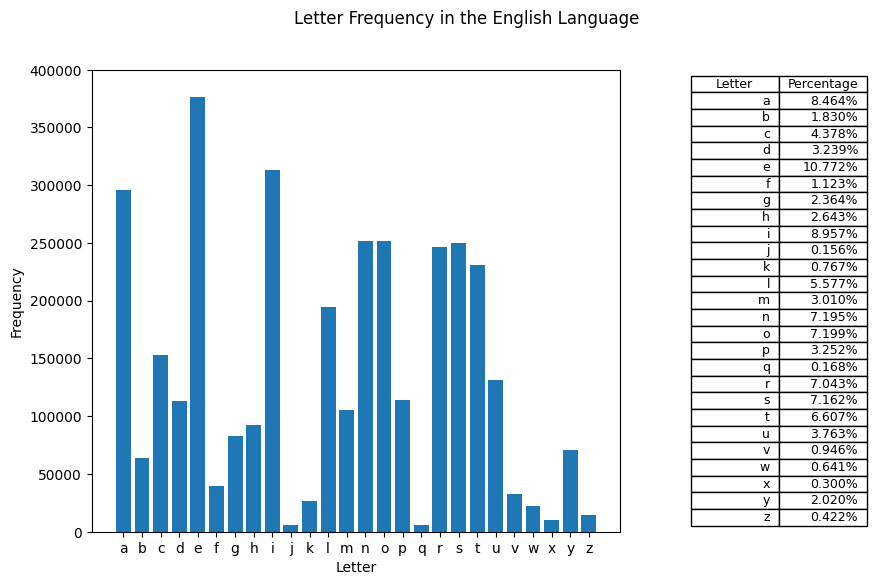

In [18]:
import matplotlib.pyplot as plt

x = letter_frequency.keys()

y = list(letter_frequency.values())

table_data = []
for key, value in letter_frequency.items():
    table_data.append([key, f"{value / sum(y):.3%}"])

ymin, ymax = 0, 400_000

fig, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios": [3, 1]}, figsize=(10, 6))


# Figure
fig.suptitle("Letter Frequency in the English Language")

# Bar Graph
ax[0].set_ylim([ymin, ymax])
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Letter")

ax[0].bar(x, y)

# Table
ax[1].axis("off")
ax[1].axis("tight")

table = ax[1].table(cellText=table_data, colLabels=["Letter", "Percentage"], loc="center")

plt.show()